# Plot data for each example

- Fingerprints for an optimized pose cluster
- Pair features for optimized pose cluster

In [1]:
import sys
import os
import numpy as np
sys.path.append('../dock')
sys.path.append('../ifp')
sys.path.append('../mcss')
sys.path.append('../score')
from prob_opt import PredictStructs
from statistics import statistics
from containers import Protein
from shared_paths import shared_paths, proteins

import matplotlib.pyplot as plt
%matplotlib inline

SLC6A4


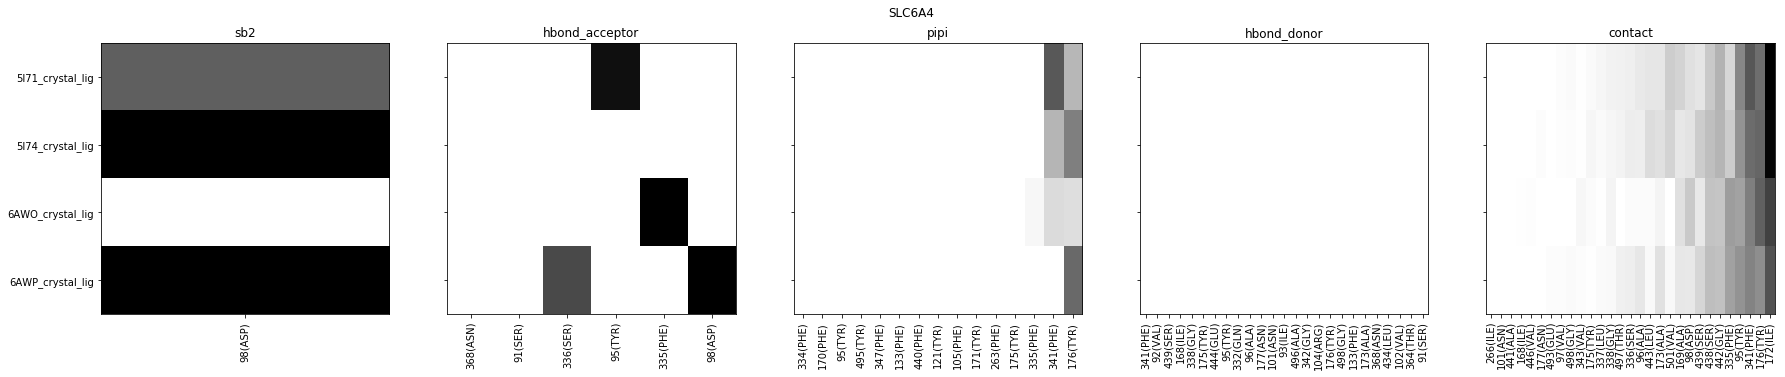

BRAF


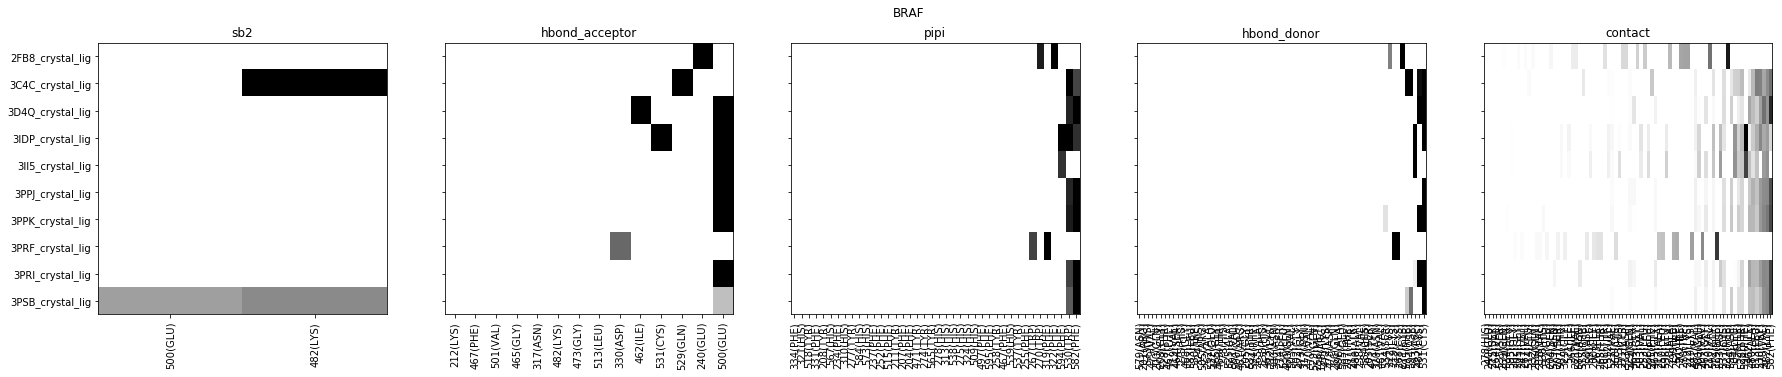

PYGM
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//PYGM/ifp/ifp4/2G9Q_struct.fp', 'fp not found')
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//PYGM/ifp/ifp4/2QRH_struct.fp', 'fp not found')
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//PYGM/ifp/ifp4/3G2I_struct.fp', 'fp not found')


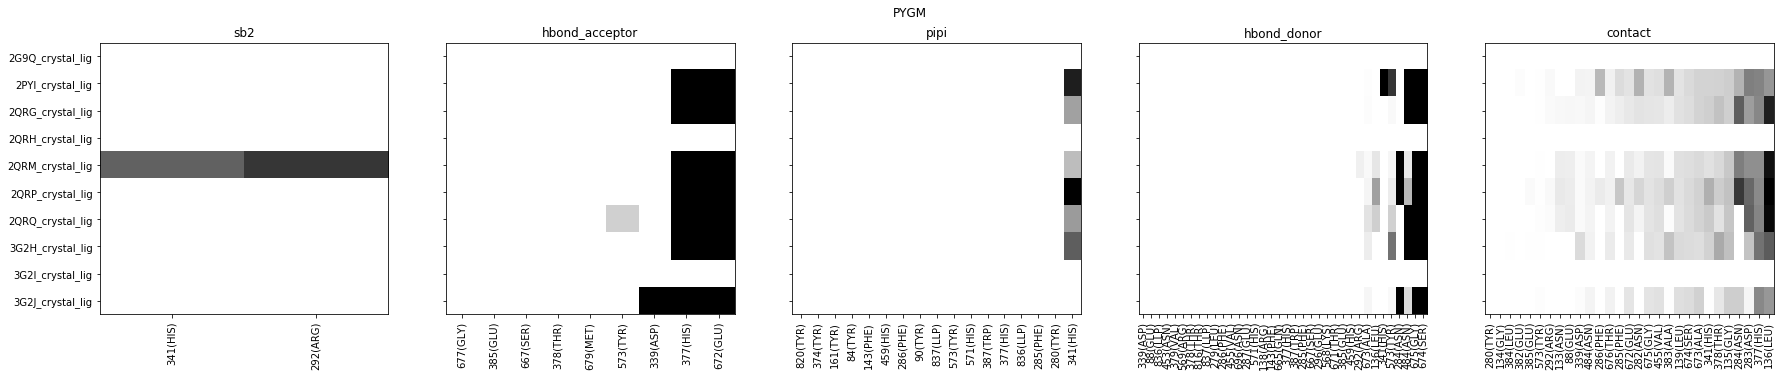

SMO


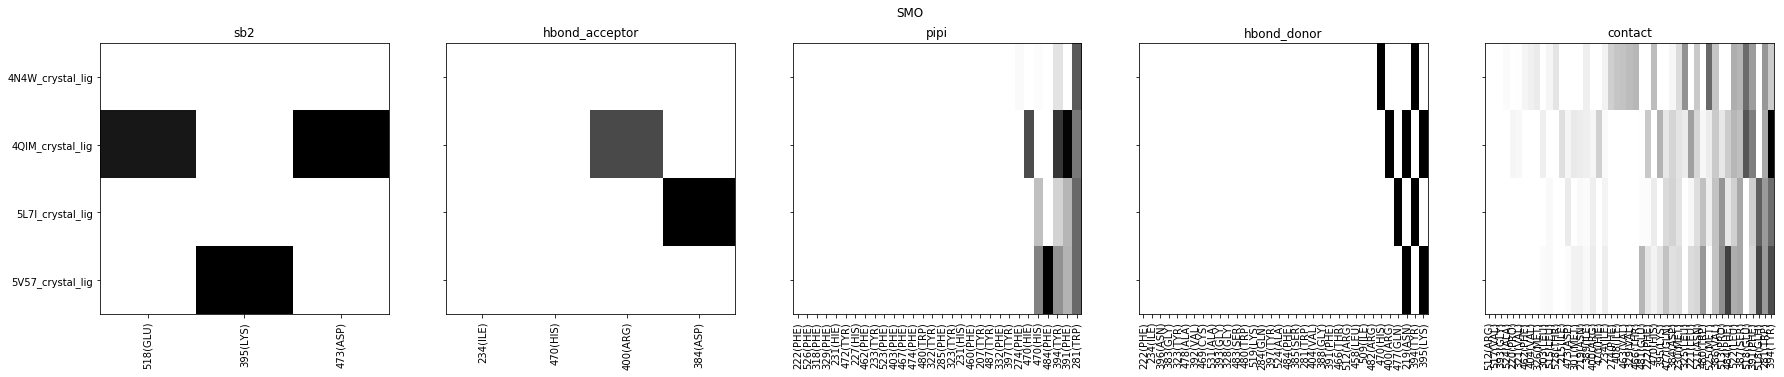

AR


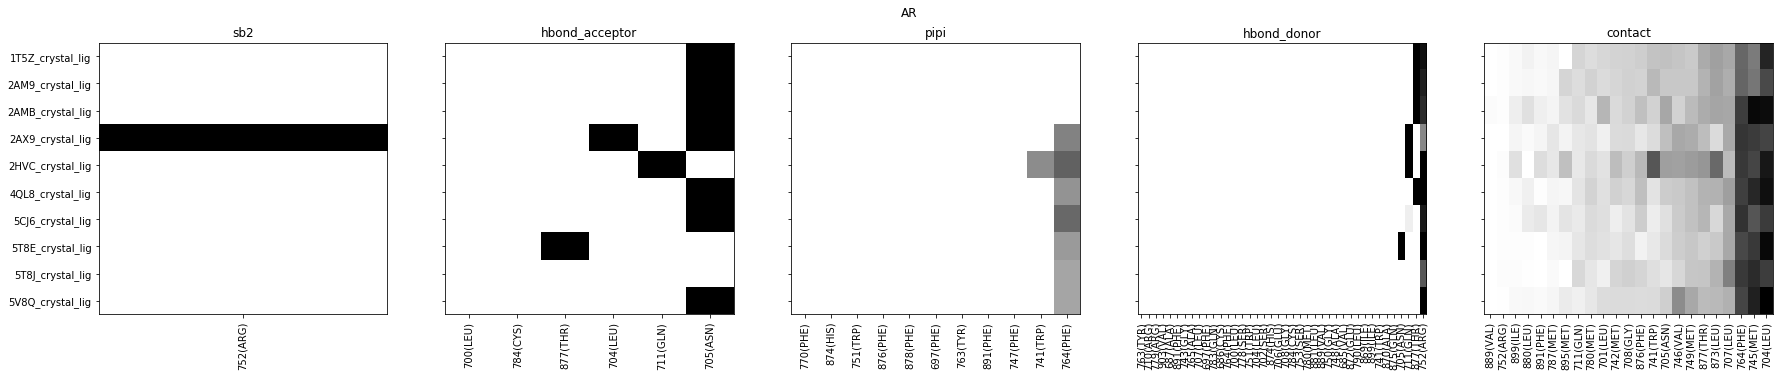

VDR


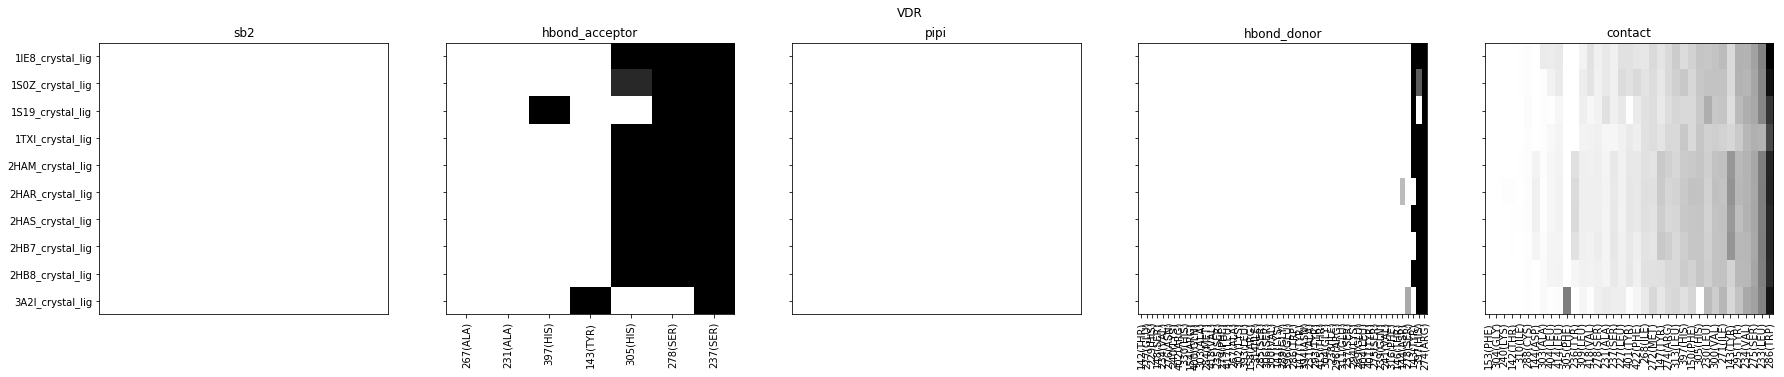

MEK1


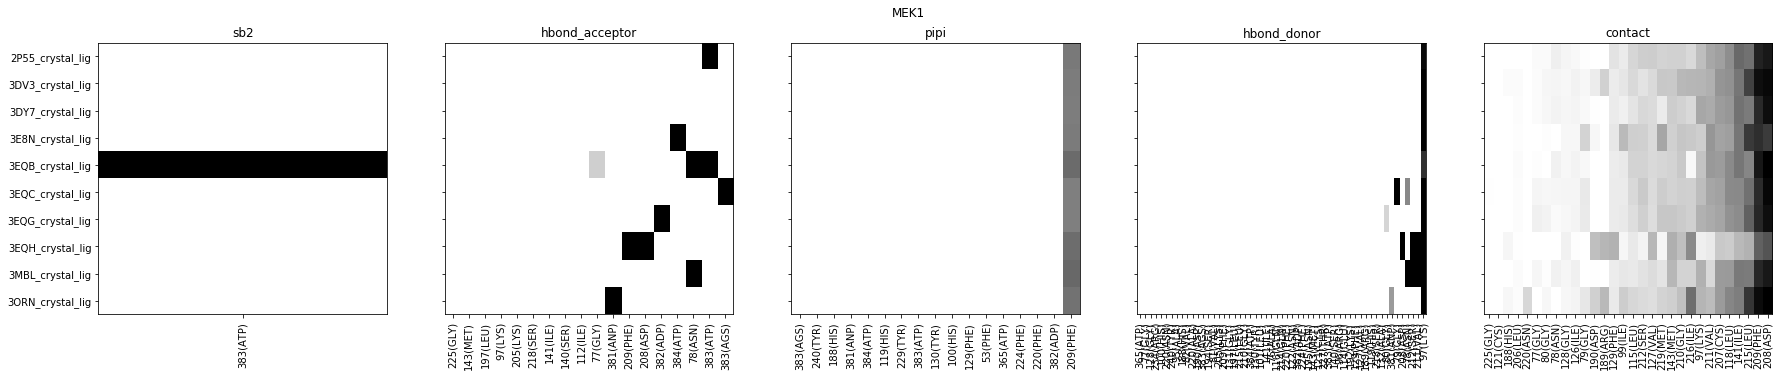

5HT2B


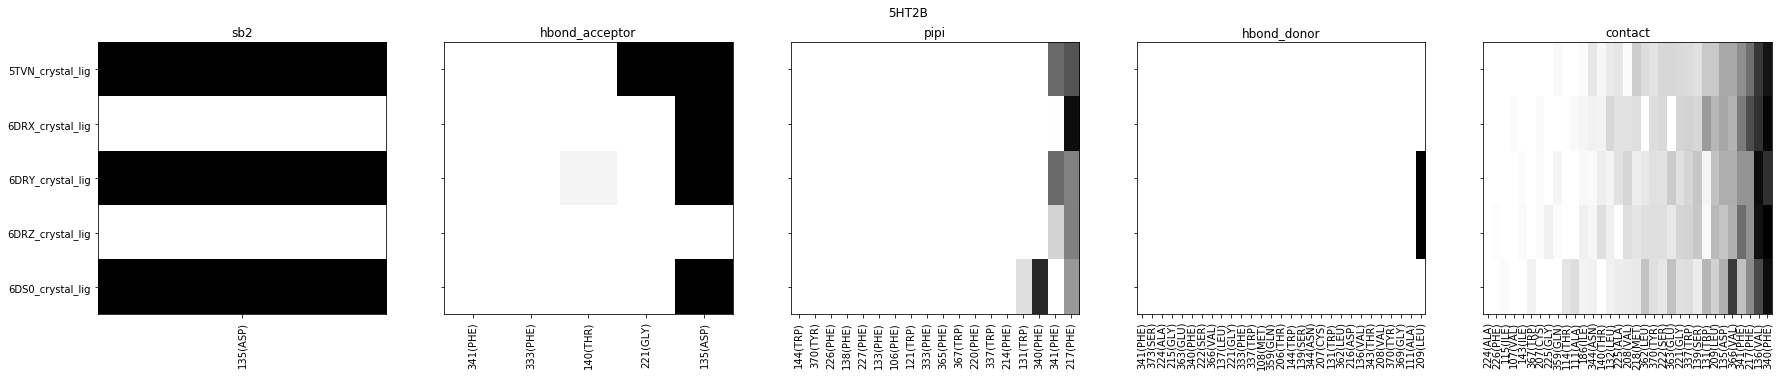

F11
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//F11/ifp/ifp4/4CR9_struct.fp', 'fp not found')


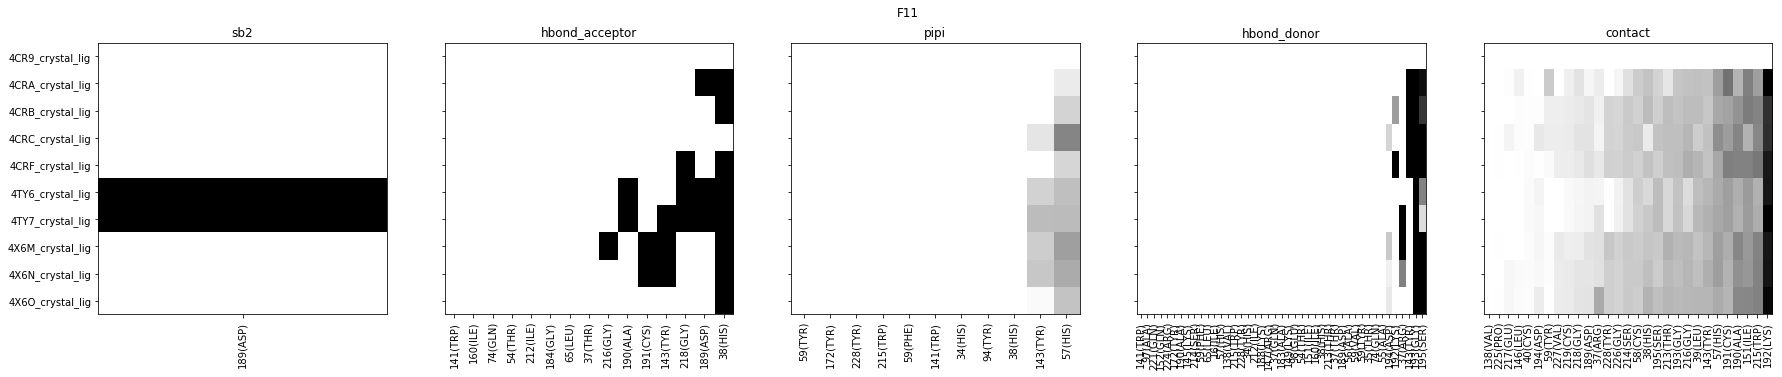

P00760


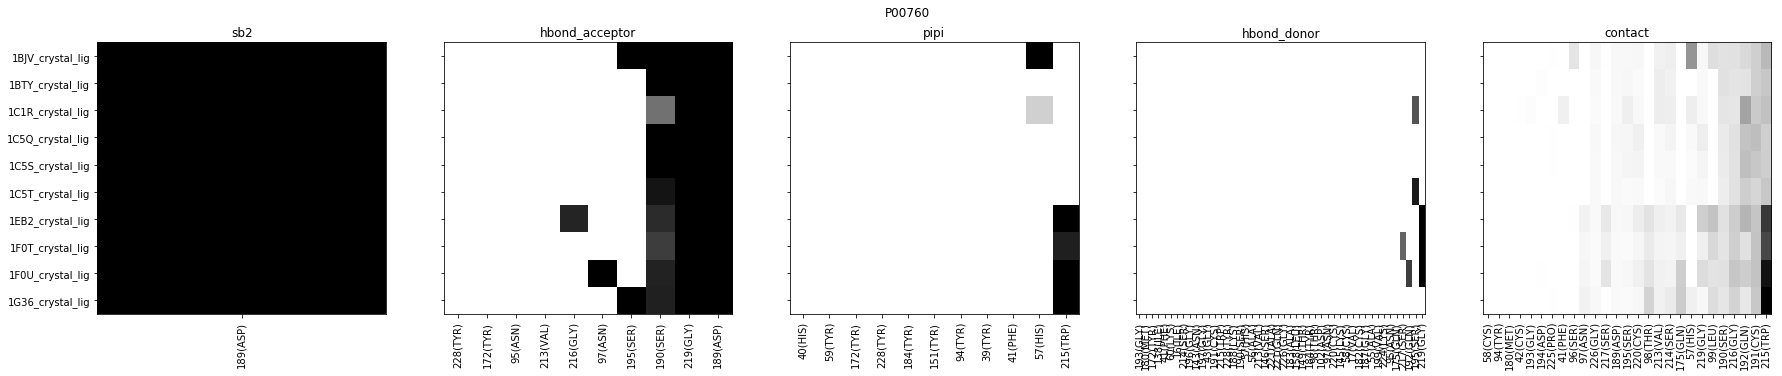

CDK2
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//CDK2/ifp/ifp4/1FIN_struct.fp', 'fp not found')


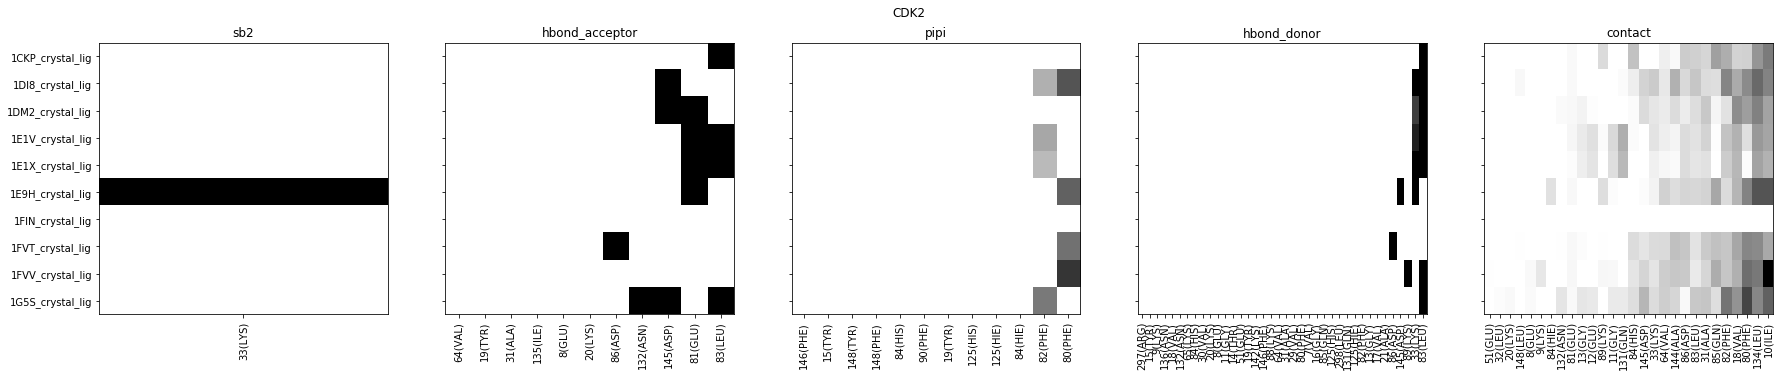

JAK2


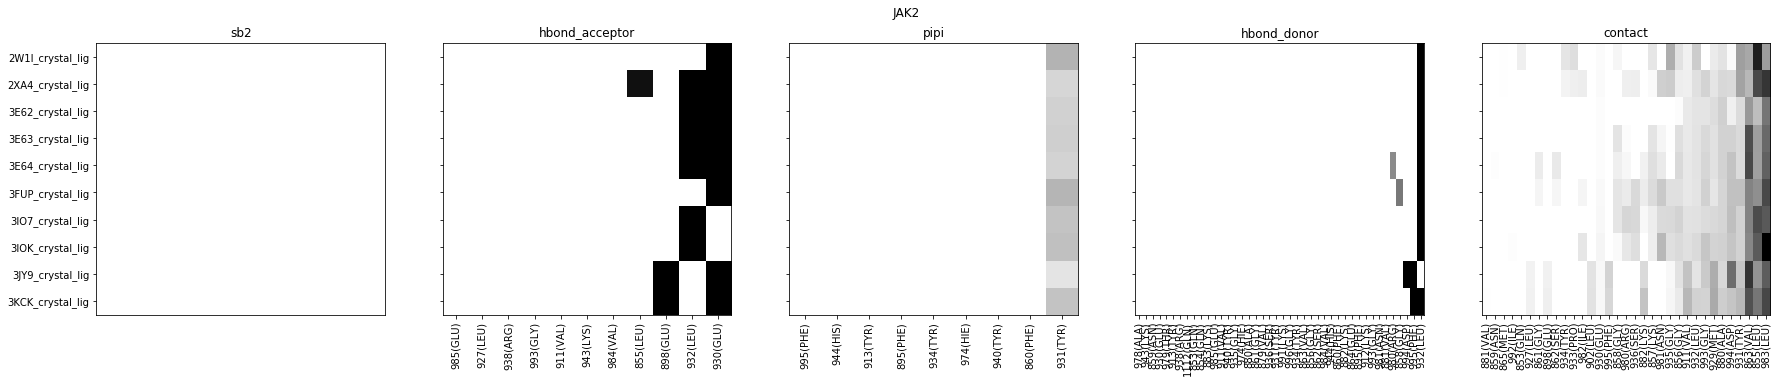

BACE1


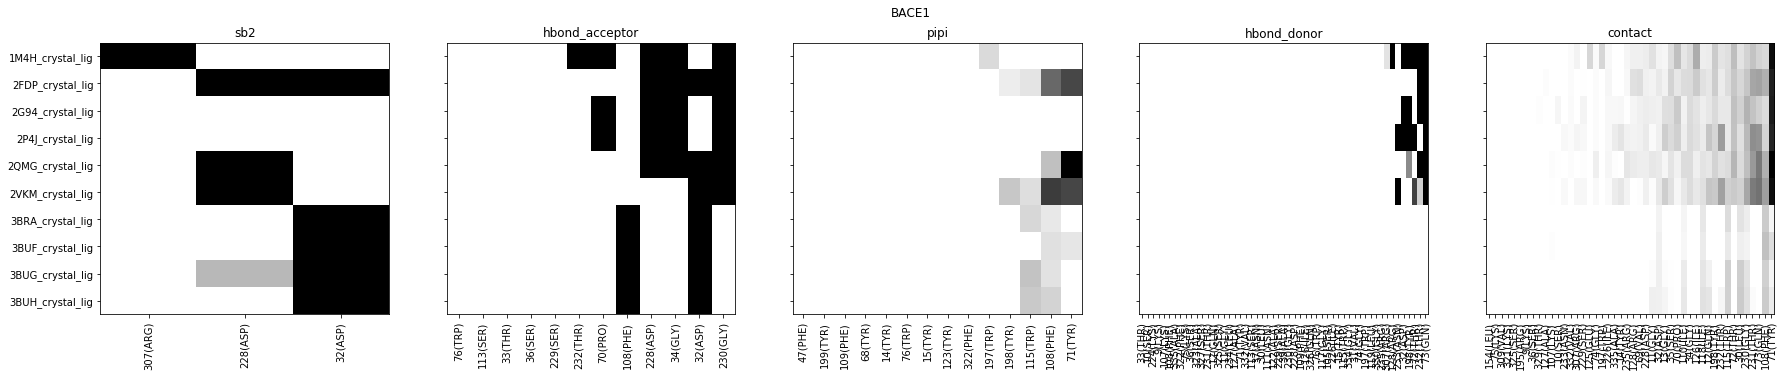

ERA


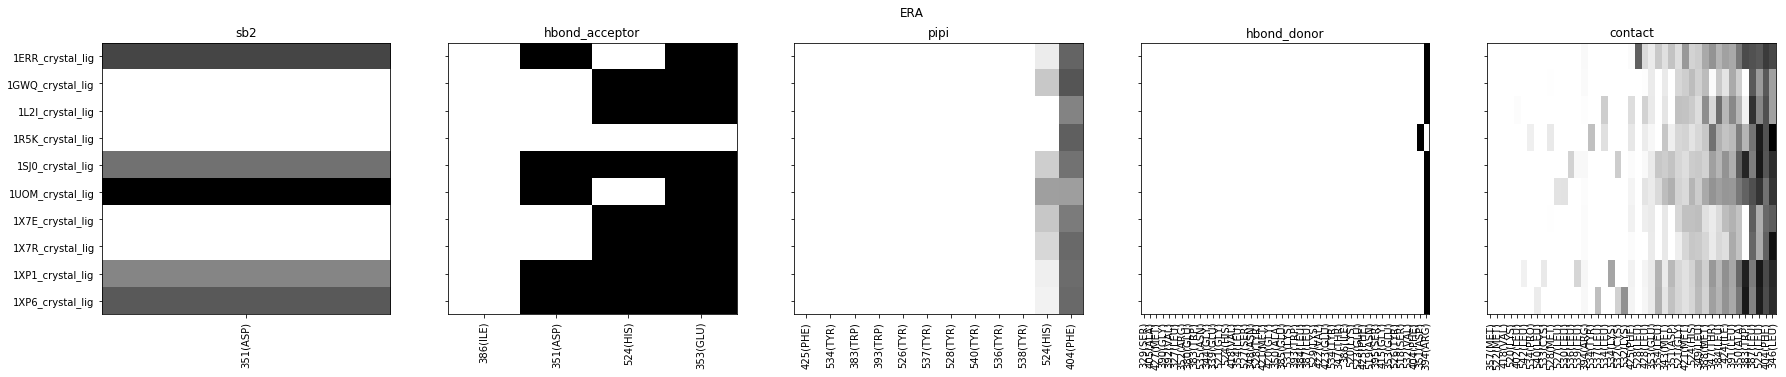

DAT


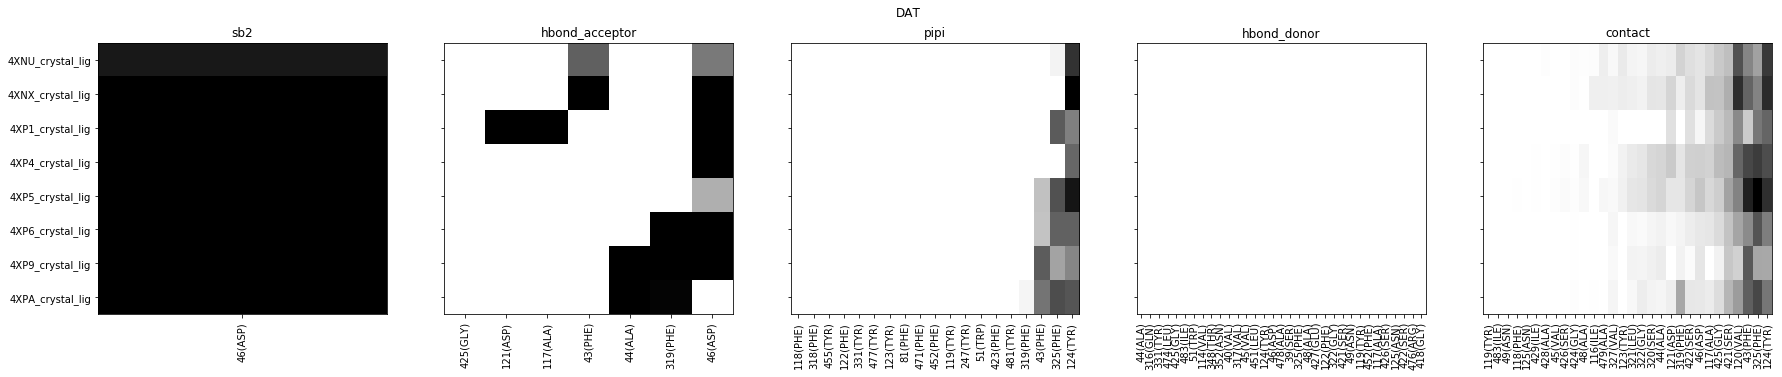

BRD4


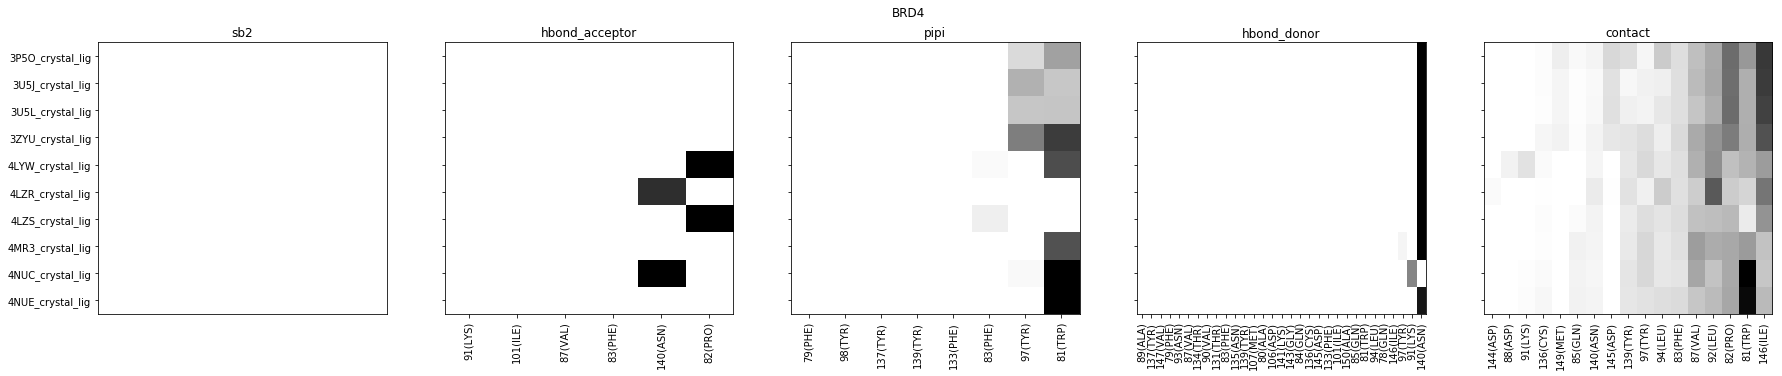

A2AR


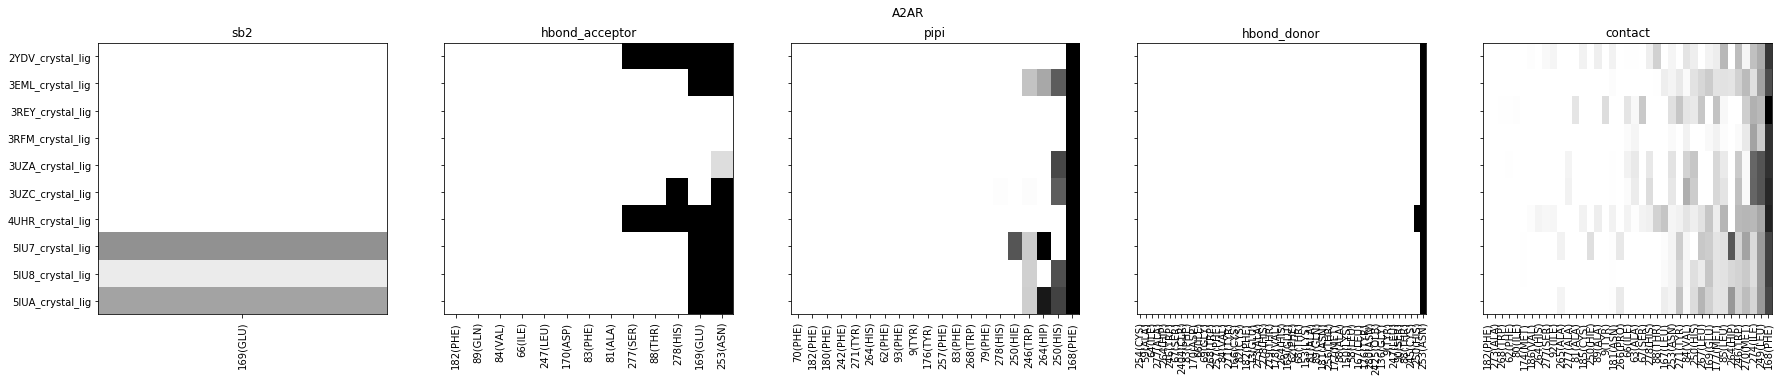

PLK1


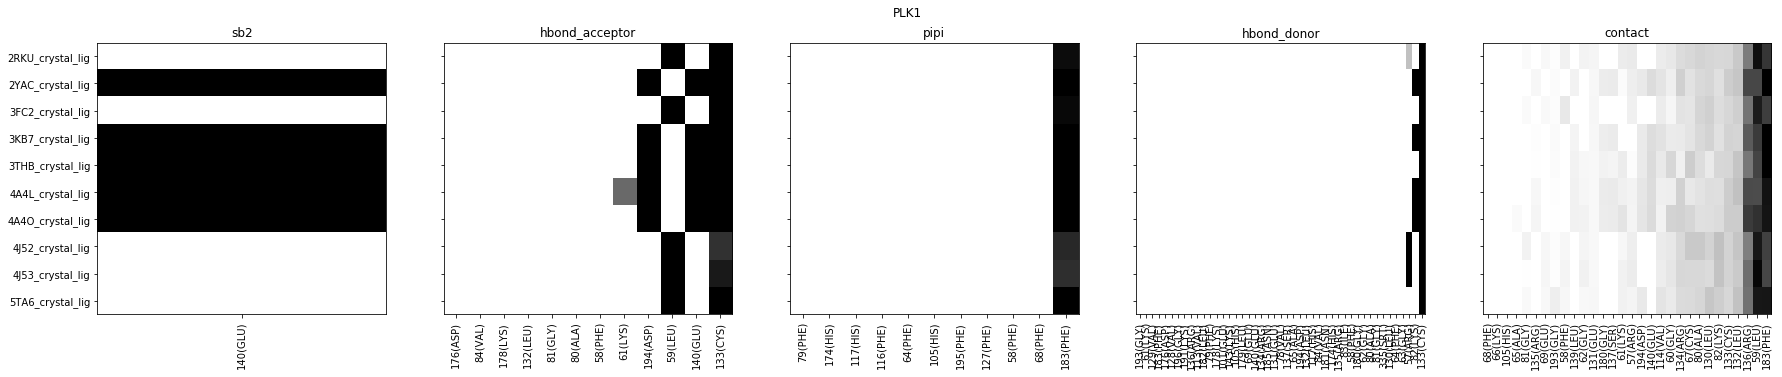

PTPN1


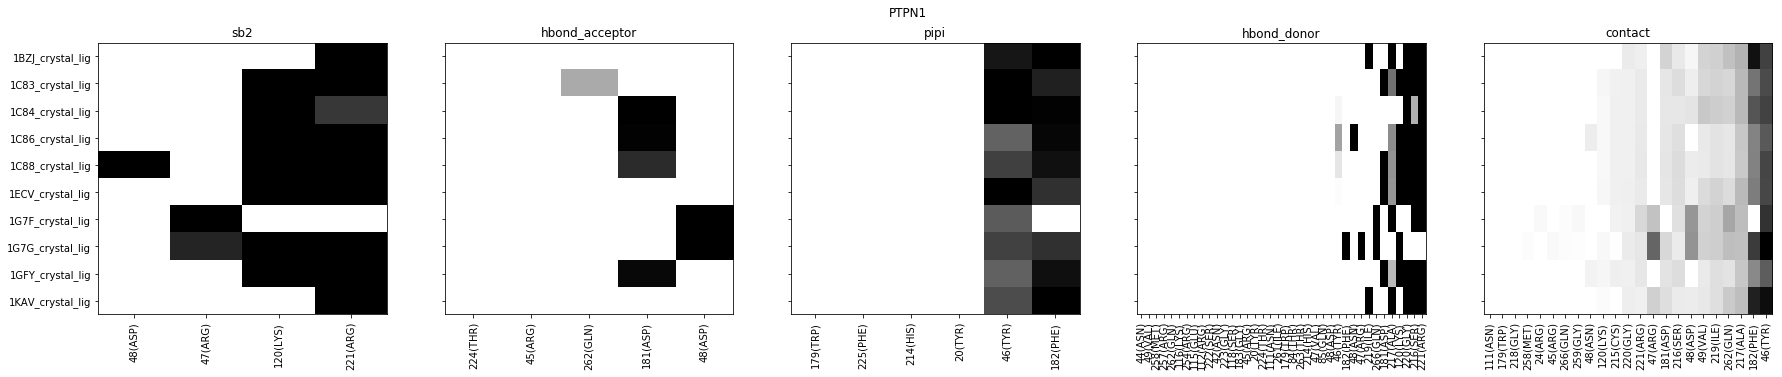

GLUT1


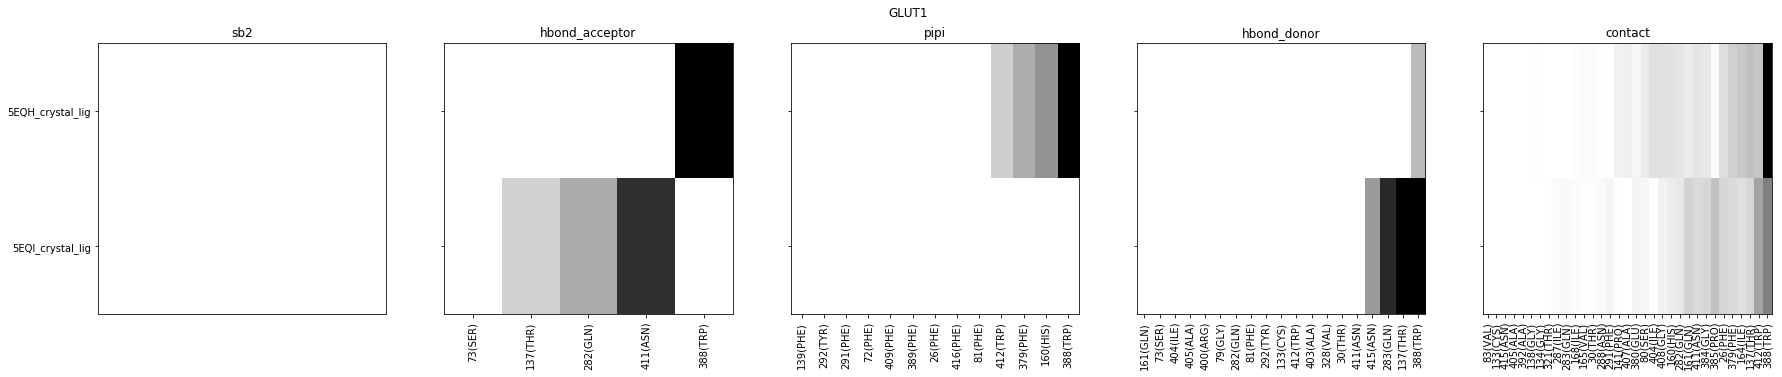

MGLUR5


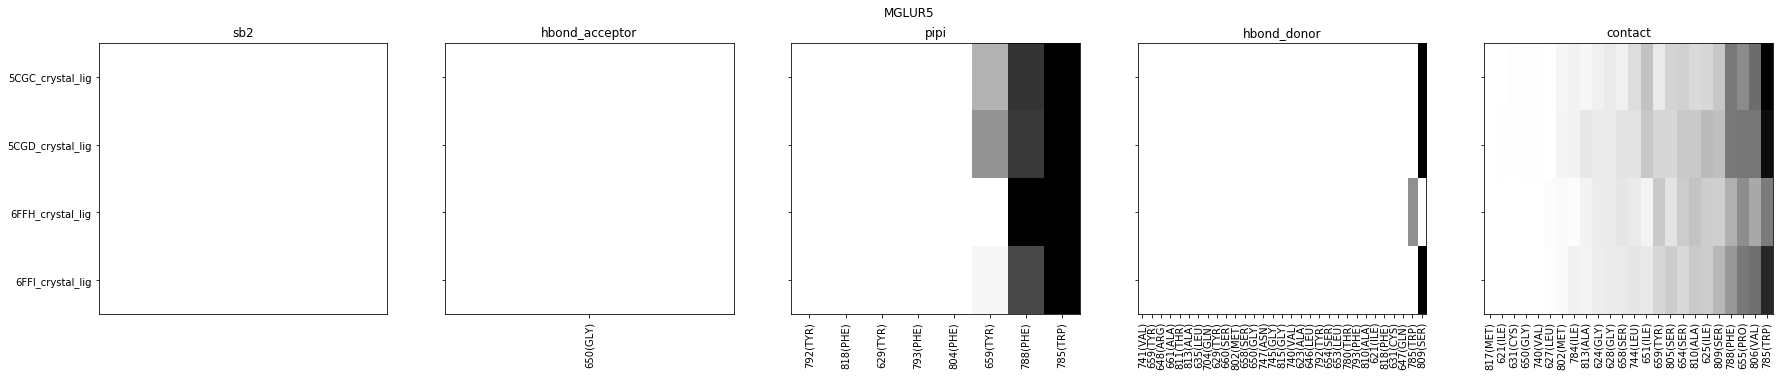

PLAU


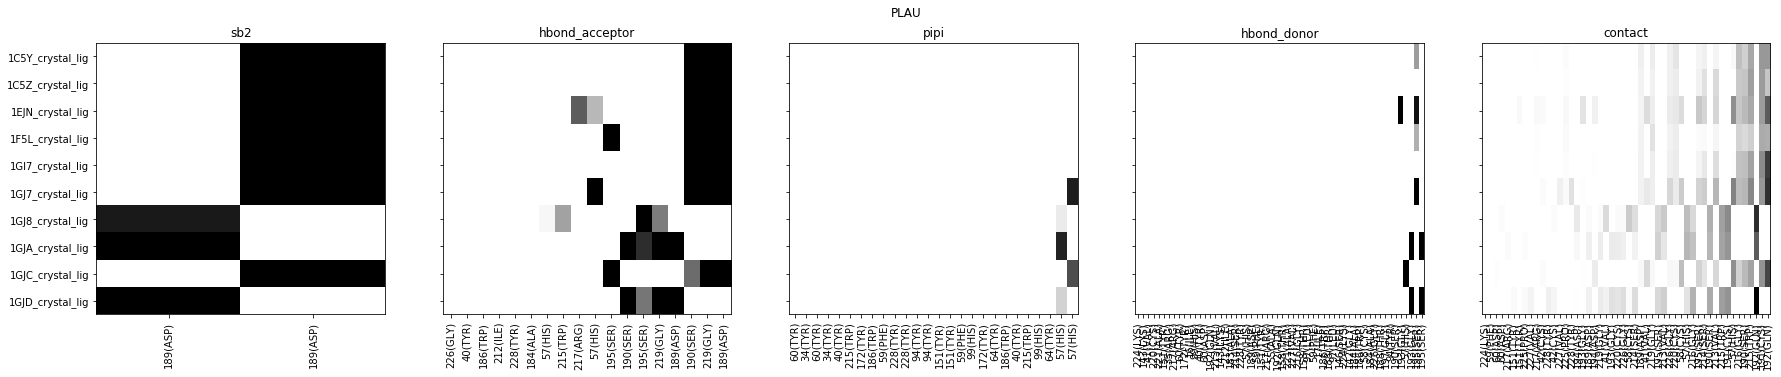

B2AR


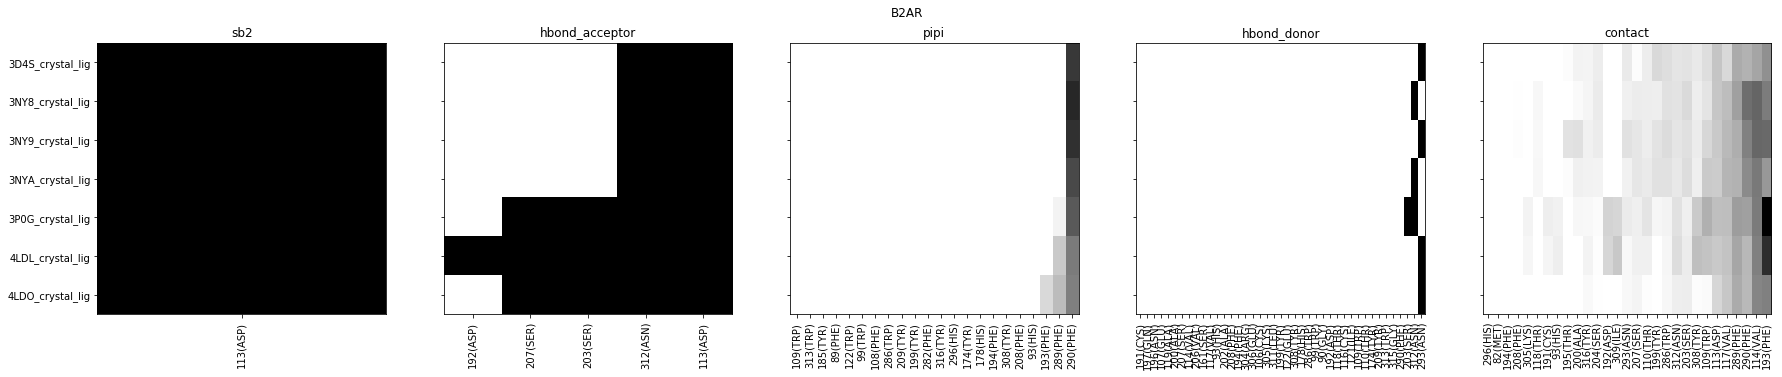

F2


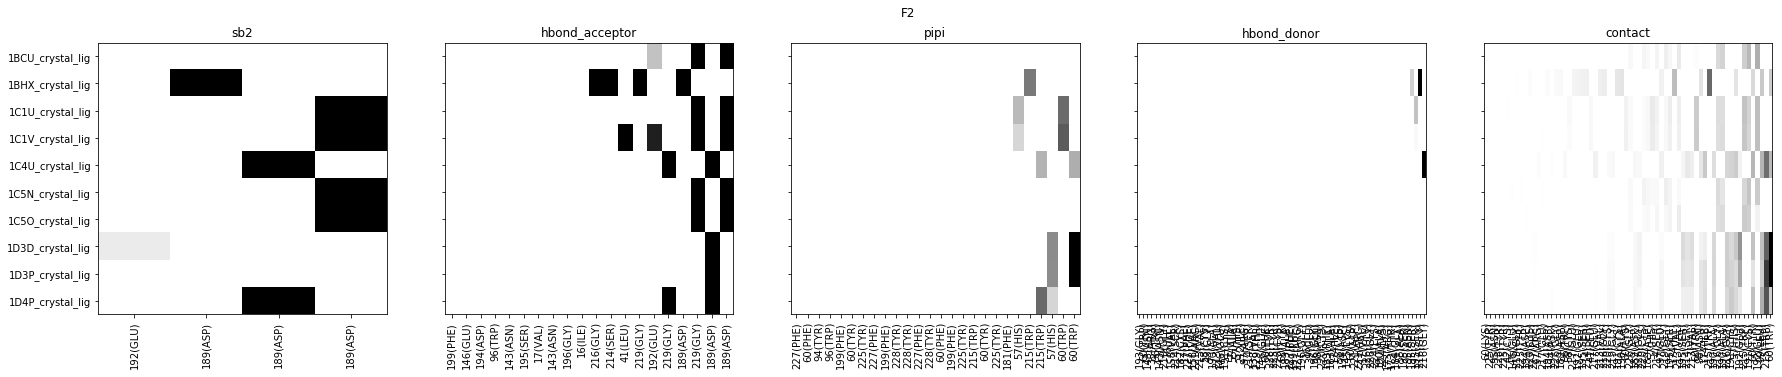

TRPV1


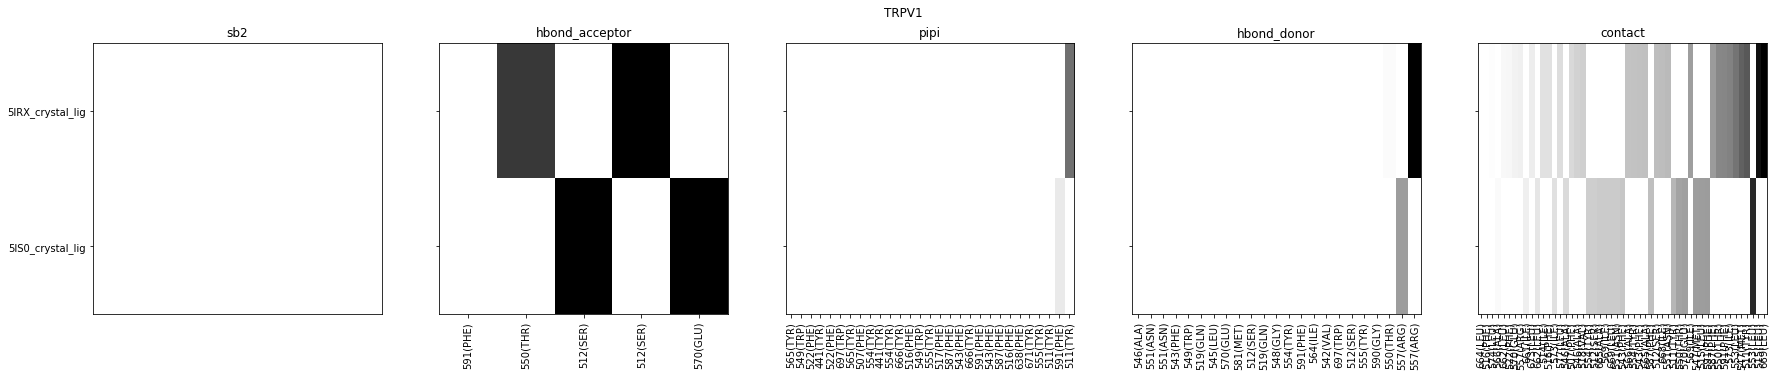

F10


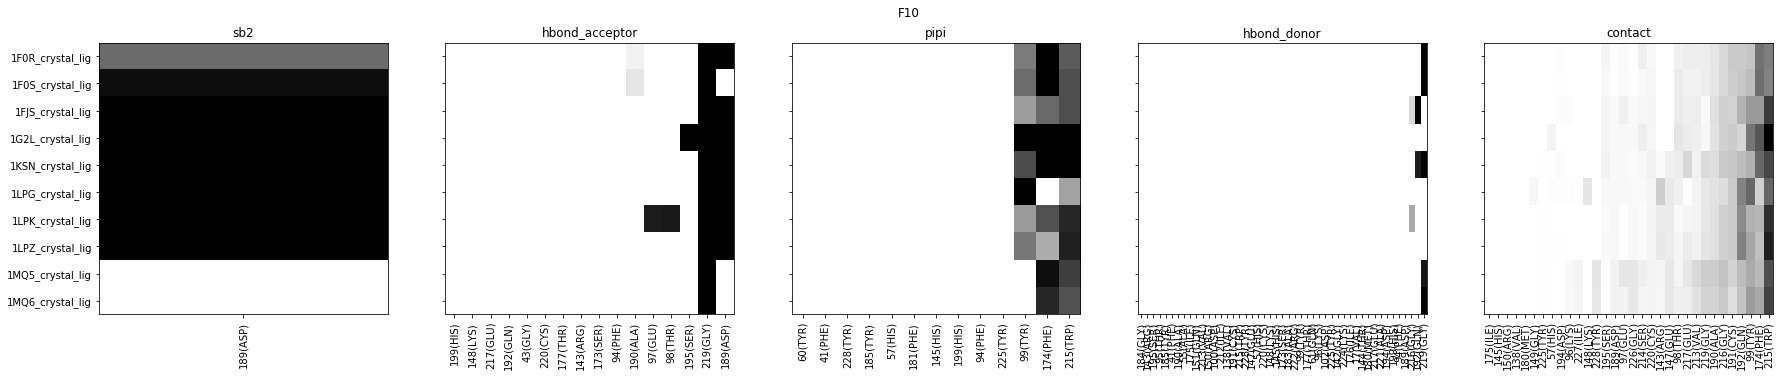

NR3C2


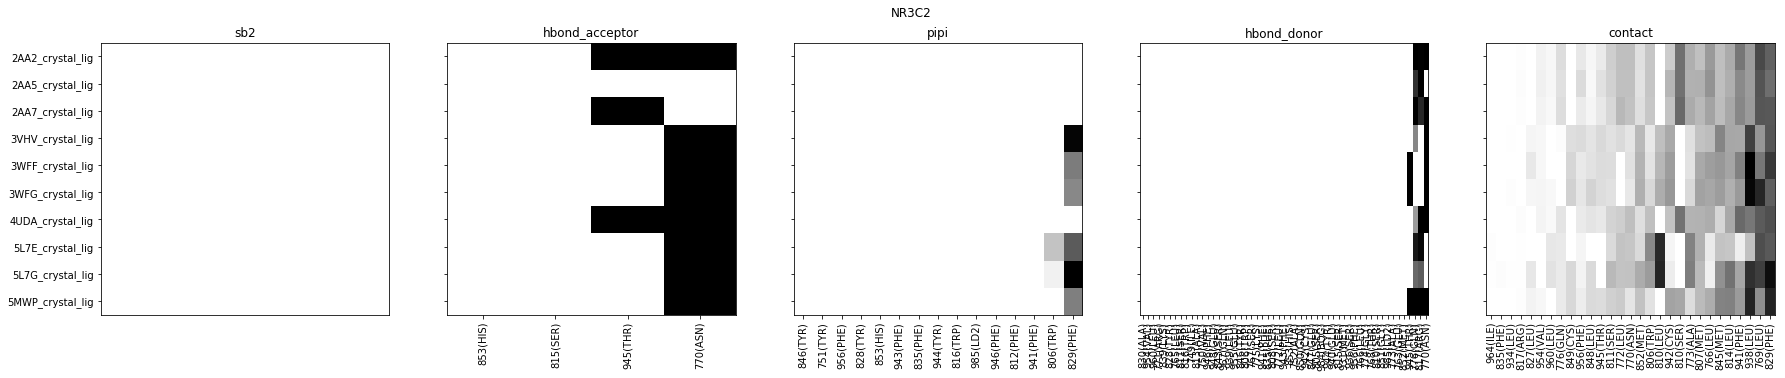

ELANE


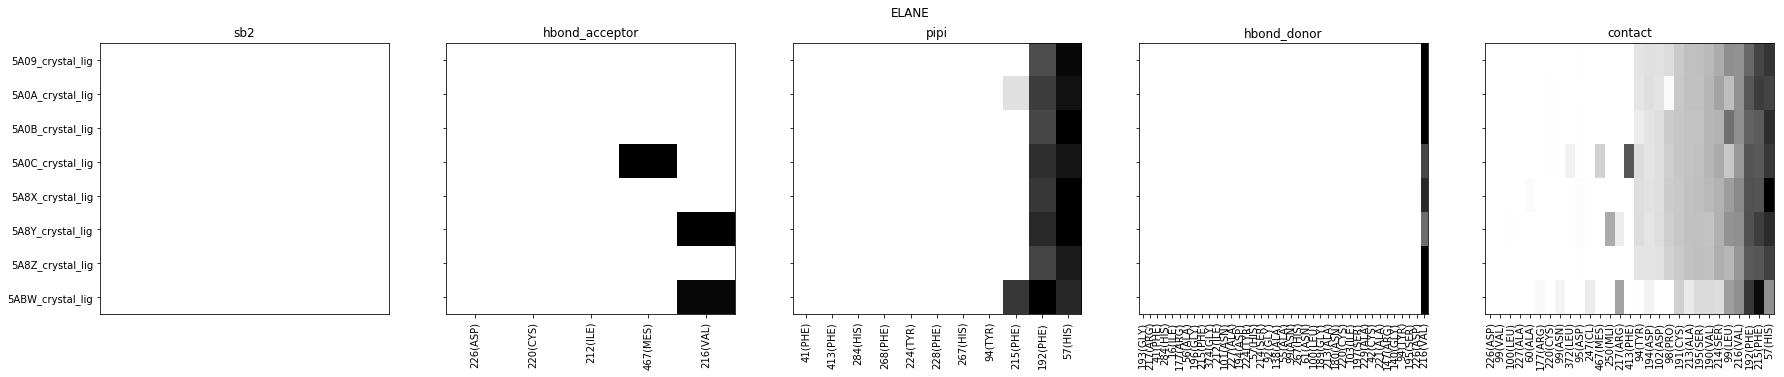

NR3C1
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//NR3C1/ifp/ifp4/4P6X_struct.fp', 'fp not found')


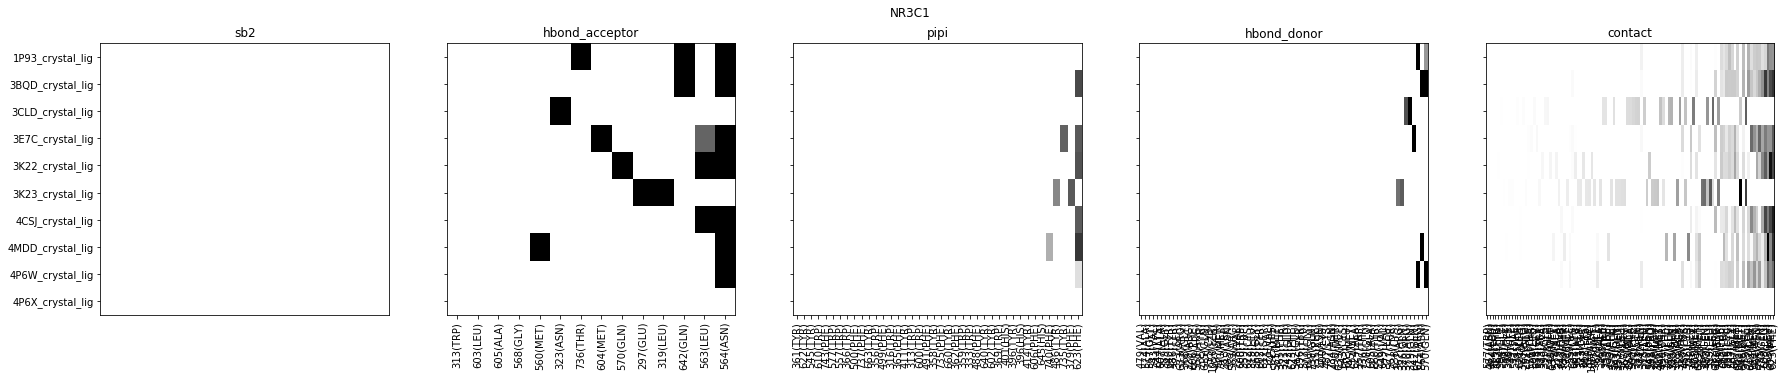

MAPK14


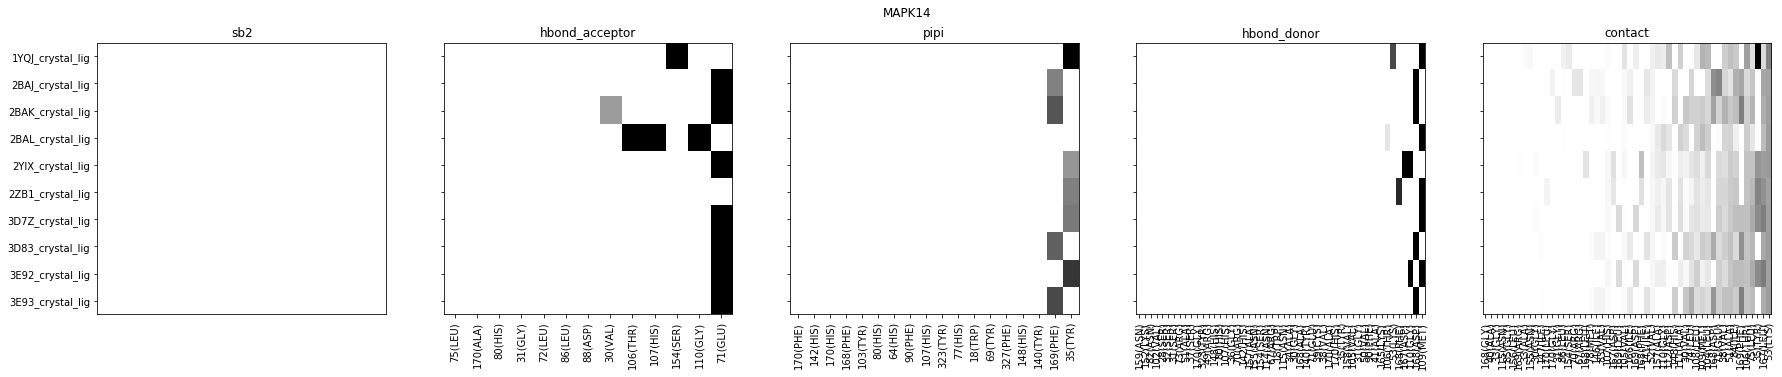

HSP90AA1
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//HSP90AA1/ifp/ifp4/2XDL_struct.fp', 'fp not found')


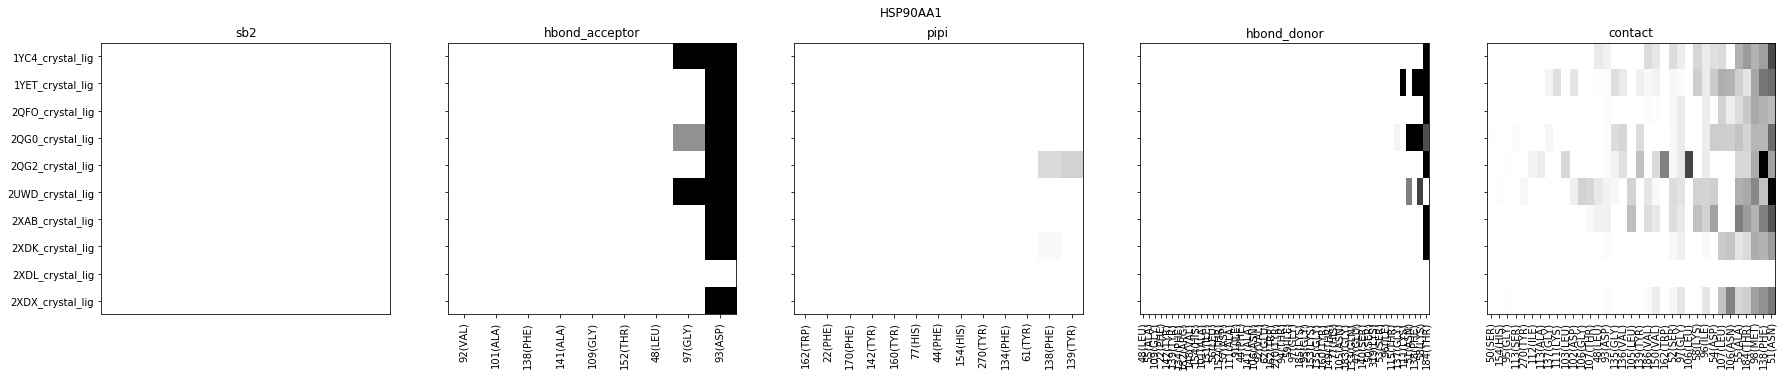

PDE10A
too many values to unpack
('/Users/jpaggi/Downloads/combind_data/bpp_data//PDE10A/ifp/ifp4/4HF4_struct.fp', 'fp not found')


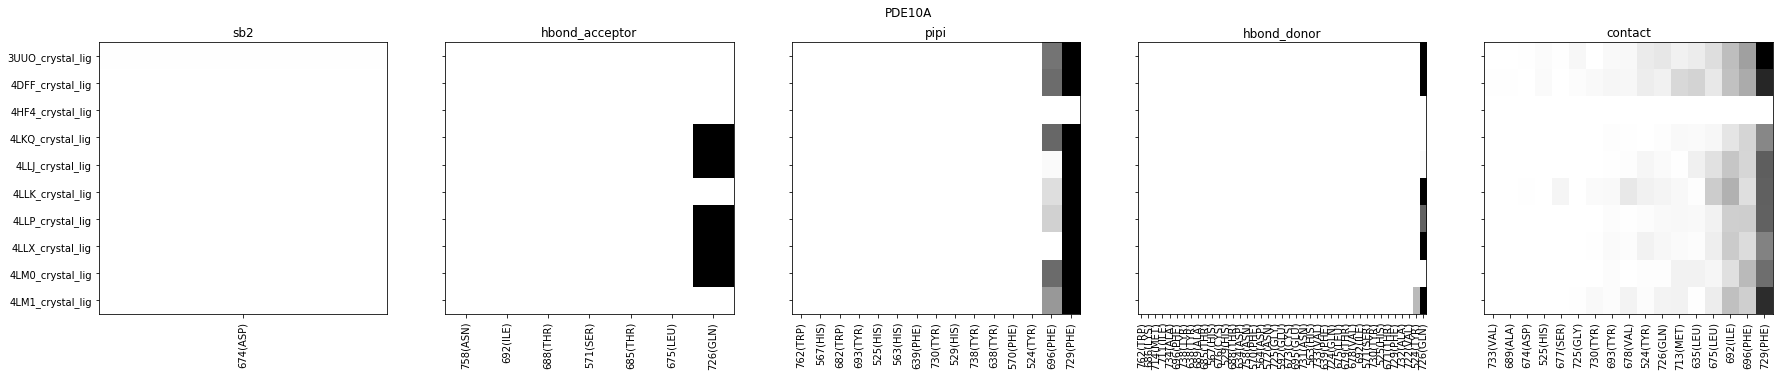

B1AR


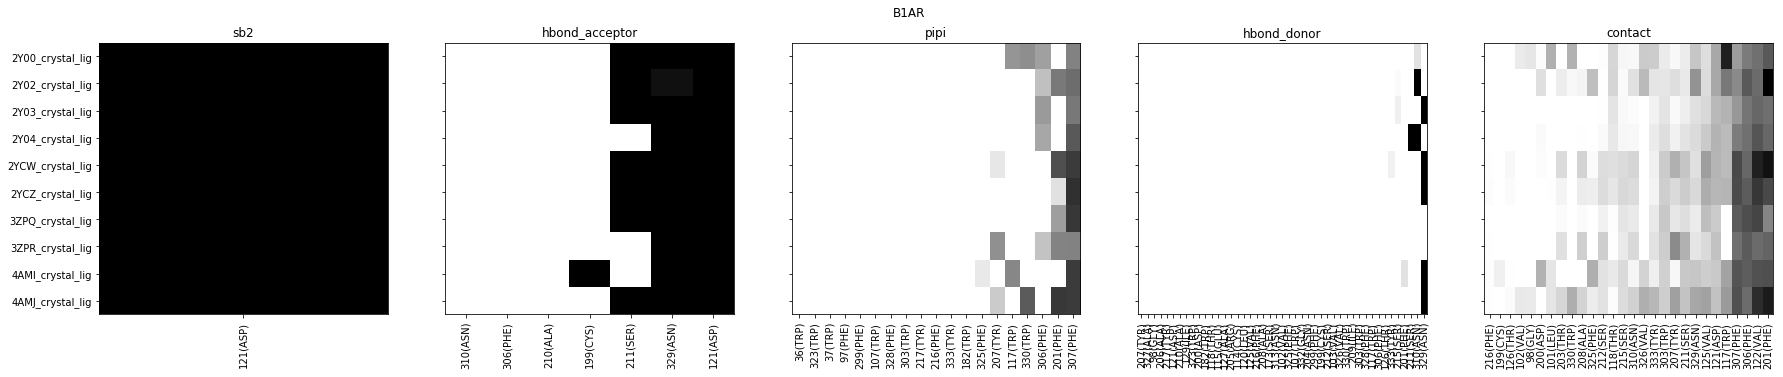

CHK1


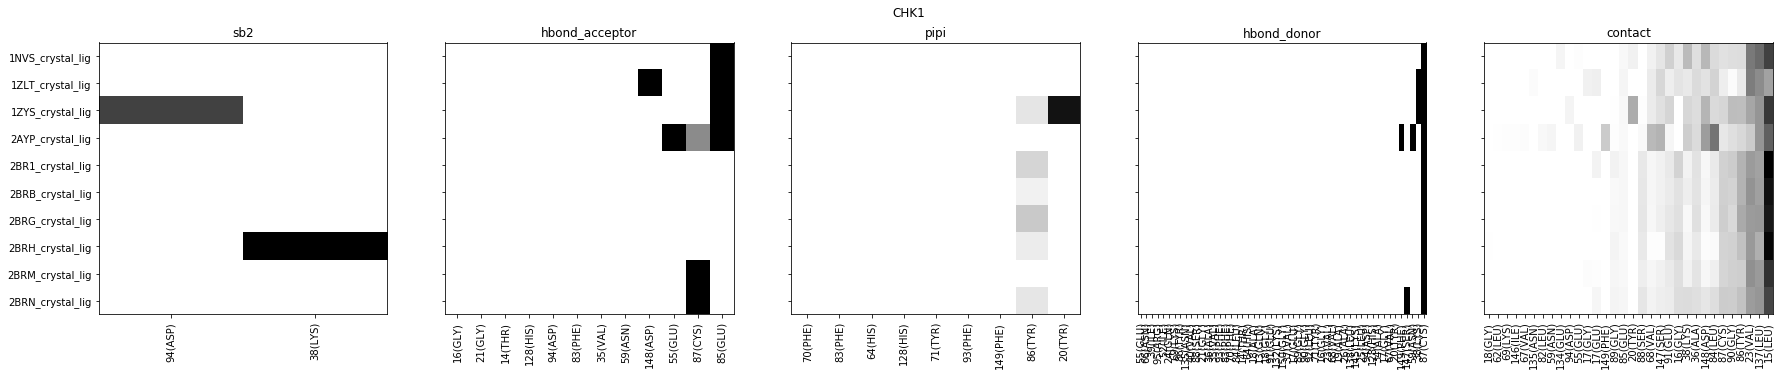

In [98]:
feature_defs = {
    'hbond_donor':[2],
    'hbond_acceptor': [3],
    'sb2':[1],
    'pipi':[6],
    'contact':[11]
}

for protein in proteins:
    print protein
    data = Protein(protein)
    ligands = [ligand.replace('_lig', '_crystal_lig') for ligand in data.lm.get_xdocked_ligands(10)]
    data.load_docking(ligands, load_crystal = True, load_fp = True)
    
    fps = {ligand_name: ligand.poses[0].fp
           for ligand_name, ligand in data.docking[data.lm.st].ligands.items()}
    
    f, ax = plt.subplots(1, 5, figsize = (30, 5), sharey = True)
    for i, (name, codes) in enumerate(feature_defs.items()):
        interactions = list(set([interaction
                                 for ligand in ligands
                                 for interaction, score in fps[ligand].items()
                                 if interaction[0] in codes]))
        
        X = []
        for ligand in ligands:
            X += [[]]
            for interaction in interactions:
                X[-1] += [fps[ligand][interaction] if interaction in fps[ligand] else 0]
        X = np.array(X)
        
        idx = X.sum(axis = 0).argsort()
        X_sorted = X[:, idx]
        xticks = [interactions[j][1][2:] for j in idx]

        if name == 'contact':
            ax[i].imshow(X_sorted, aspect = 'auto', cmap = 'binary')
        else:
            ax[i].imshow(X_sorted, aspect = 'auto', cmap = 'binary', vmin = 0, vmax = 1)
        ax[i].set_xticks(range(len(xticks)))
        ax[i].set_xticklabels(xticks, rotation = 'vertical')
        ax[i].set_title(name)
    
    plt.yticks(range(len(ligands)), ligands)
    plt.suptitle(protein)
    plt.show()